Data loaded successfully from '../data/processed/cleaned_data.csv'
Feature Engineering Complete. New columns added:
  bmi_cat  glucose_cat      age_cat  risk_score  age_glucose_interaction
0   Obese     Diabetic       Senior           4                 15322.23
1   Obese     Diabetic  Middle_Aged           2                 12334.81
2   Obese       Normal       Senior           3                  8473.60
3   Obese  Prediabetic  Middle_Aged           1                  8390.27
4  Normal  Prediabetic       Senior           2                 13755.48


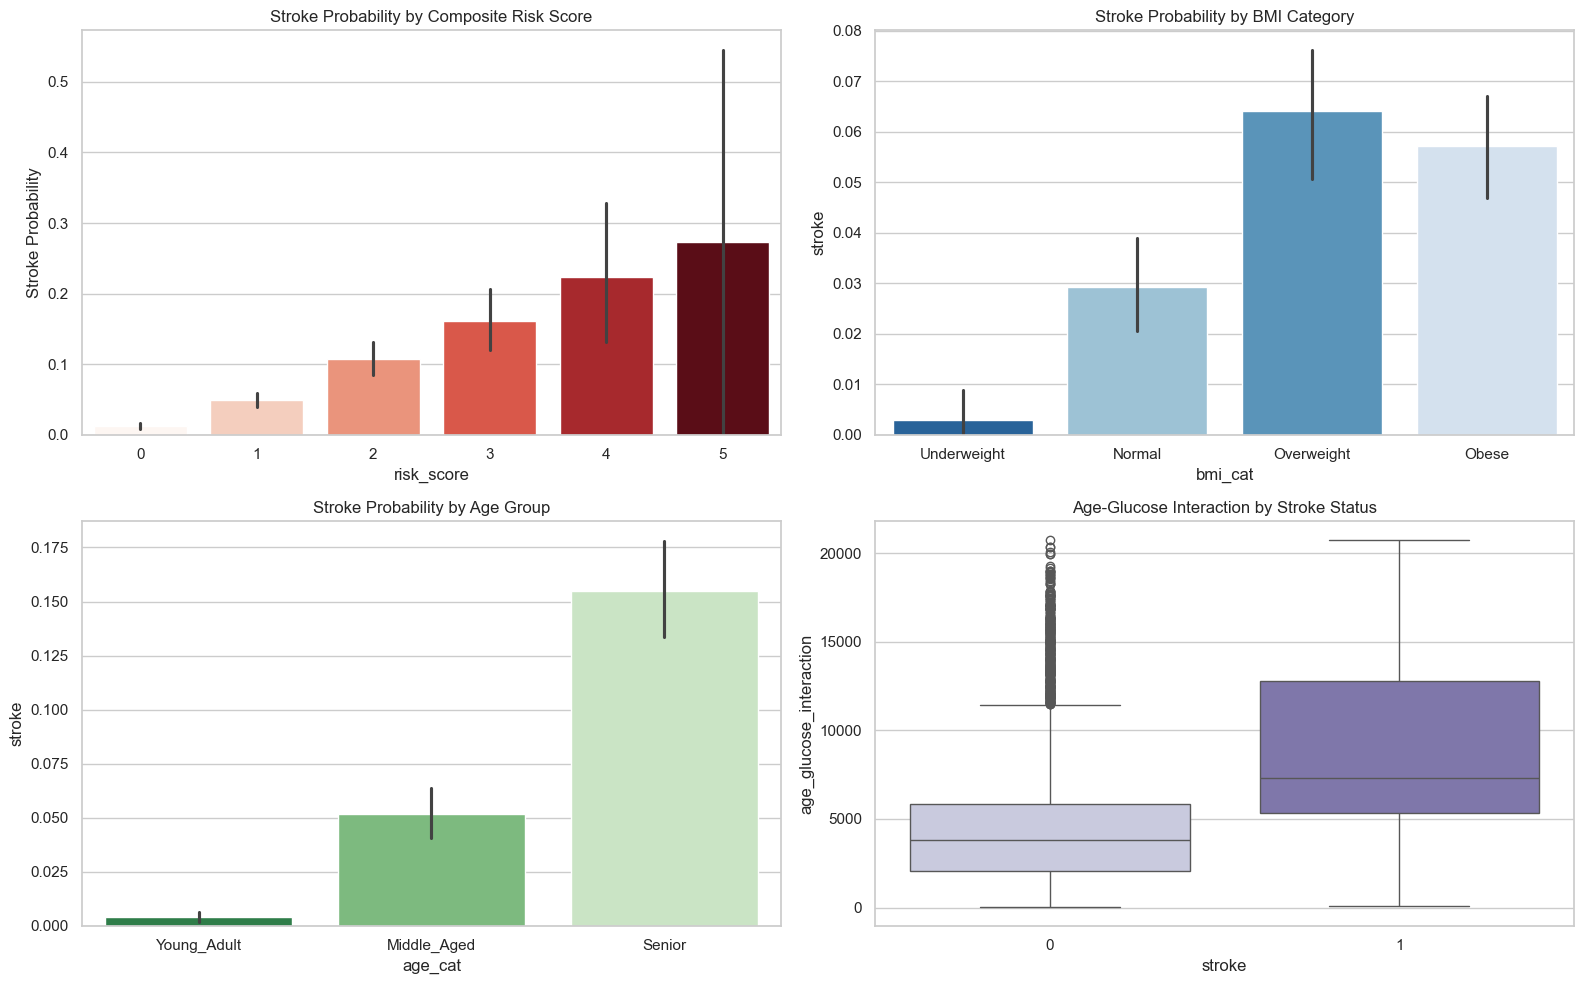

Saved 'final_modeling_data.csv' (for ML) and 'dashboard_data.csv' (for Dashboard).


In [1]:
# Cell 1: Setup and Load Clean Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load the data cleaned in the previous step
try:
    df = pd.read_csv('../data/processed/cleaned_data.csv')
    print("Data loaded successfully from '../data/processed/cleaned_data.csv'")
except FileNotFoundError:
    print("Error: File not found. Please ensure you saved the cleaned data in the previous notebook.")

# Cell 2: Feature Engineering (Creating 5 New Features)
# Requirement: Create at least 5 meaningful features and document rationale.

# 1. BMI Category (Categorical)
# Rationale: Clinical risk is often assessed by BMI ranges, not just the raw number.
# <18.5 (Underweight), 18.5-24.9 (Normal), 25-29.9 (Overweight), >30 (Obese)
def categorize_bmi(bmi):
    if bmi < 18.5: return 'Underweight'
    elif 18.5 <= bmi < 25: return 'Normal'
    elif 25 <= bmi < 30: return 'Overweight'
    else: return 'Obese'

df['bmi_cat'] = df['bmi'].apply(categorize_bmi)

# 2. Glucose Risk Group (Categorical)
# Rationale: Diabetes is a major stroke risk factor. Grouping by diabetic criteria captures this non-linearity.
# Normal < 140, Prediabetes 140-199, Diabetes >= 200 (Simplified non-fasting standard)
def categorize_glucose(glucose):
    if glucose < 140: return 'Normal'
    elif 140 <= glucose < 200: return 'Prediabetic'
    else: return 'Diabetic'

df['glucose_cat'] = df['avg_glucose_level'].apply(categorize_glucose)

# 3. Age Group (Categorical)
# Rationale: Stroke risk doubles every decade after 55. Categorizing helps the model find these steps.
def categorize_age(age):
    if age < 45: return 'Young_Adult'
    elif 45 <= age < 65: return 'Middle_Aged'
    else: return 'Senior'

df['age_cat'] = df['age'].apply(categorize_age)

# 4. Composite Risk Score (Numerical)
# Rationale: Combining multiple binary risk factors creates a stronger signal for "overall health."
# Formula: Hypertension (1) + Heart Disease (1) + (1 if Obese) + (1 if Diabetic) + (1 if Senior)
df['risk_score'] = (
    df['hypertension'] +
    df['heart_disease'] +
    (df['bmi_cat'] == 'Obese').astype(int) +
    (df['glucose_cat'] == 'Diabetic').astype(int) +
    (df['age_cat'] == 'Senior').astype(int)
)

# 5. Age-Glucose Interaction (Numerical)
# Rationale: High glucose is more dangerous in older patients. Interaction terms capture this combined effect.
df['age_glucose_interaction'] = df['age'] * df['avg_glucose_level']

print("Feature Engineering Complete. New columns added:")
print(df[['bmi_cat', 'glucose_cat', 'age_cat', 'risk_score', 'age_glucose_interaction']].head())

# Cell 3: Validate Impact of New Features
# Requirement: Demonstrate impact on model performance/target variable.

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Visualizing Risk Score vs Stroke
sns.barplot(x='risk_score', y='stroke', data=df, ax=axes[0,0], palette="Reds", hue='risk_score', legend=False)
axes[0,0].set_title('Stroke Probability by Composite Risk Score')
axes[0,0].set_ylabel('Stroke Probability')

# Visualizing BMI Category vs Stroke
sns.barplot(x='bmi_cat', y='stroke', data=df, ax=axes[0,1], order=['Underweight', 'Normal', 'Overweight', 'Obese'], palette="Blues", hue='bmi_cat', legend=False)
axes[0,1].set_title('Stroke Probability by BMI Category')

# Visualizing Age Group vs Stroke
sns.barplot(x='age_cat', y='stroke', data=df, ax=axes[1,0], order=['Young_Adult', 'Middle_Aged', 'Senior'], palette="Greens", hue='age_cat', legend=False)
axes[1,0].set_title('Stroke Probability by Age Group')

# Visualizing Interaction Term (Boxplot)
sns.boxplot(x='stroke', y='age_glucose_interaction', data=df, ax=axes[1,1], hue='stroke', palette="Purples", legend=False)
axes[1,1].set_title('Age-Glucose Interaction by Stroke Status')

plt.tight_layout()
plt.show()

# Cell 4: Encoding and Saving for Modeling
# We need to turn our categorical text features into numbers (One-Hot Encoding) for the ML models.

# Drop the intermediate categorical text columns if you prefer, or keep them for the Dashboard.
# For modeling, we usually create a separate dataset with dummies.
df_model = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi_cat', 'glucose_cat', 'age_cat'], drop_first=True)

# Save the feature-engineered data
df_model.to_csv('../data/processed/final_modeling_data.csv', index=False)
# Save the readable data (with text categories) for the Dashboard later
df.to_csv('../data/processed/dashboard_data.csv', index=False)

print("Saved 'final_modeling_data.csv' (for ML) and 'dashboard_data.csv' (for Dashboard).")